## We covered a lot of information today and I'd like you to practice developing classification trees on your own. For each exercise, work through the problem, determine the result, and provide the requested interpretation in comments along with the code. The point is to build classifiers, not necessarily good classifiers (that will hopefully come later)

### 1. Load the iris dataset and create a holdout set that is 50% of the data (50% in training and 50% in test). Output the results (don't worry about creating the tree visual unless you'd like to) and discuss them briefly (are they good or not?)

In [1]:
from sklearn import datasets
import pandas as pd
%matplotlib inline
from sklearn import datasets
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [4]:
iris.keys()

dict_keys(['target_names', 'DESCR', 'data', 'feature_names', 'target'])

In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [7]:
iris['data']


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
x = iris.data[:,2:] # the attributes # we are picking up only the info on petal length and width
y = iris.target # the target variable

In [10]:
# The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
dt = tree.DecisionTreeClassifier()

In [11]:
# .fit testing
dt = dt.fit(x,y)

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.50,train_size=0.50)

In [14]:
dt = dt.fit(x_train,y_train)

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [16]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [17]:
measure_performance(x_test,y_test,dt) #measure on the test data (rather than train)

Accuracy:0.987 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          1       0.96      1.00      0.98        26
          2       1.00      0.96      0.98        25

avg / total       0.99      0.99      0.99        75
 

Confusion matrix
[[24  0  0]
 [ 0 26  0]
 [ 0  1 24]] 



In [18]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
y_pred = dt.fit(x_train, y_train).predict(x_test) #generate a prediction based on the model created to output a predicted y

Confusion matrix, without normalization
[[24  0  0]
 [ 0 26  0]
 [ 0  1 24]]


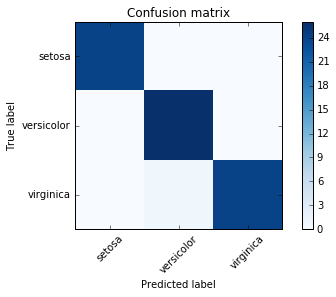

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

### 2. Redo the model with a 75% - 25% training/test split and compare the results. Are they better or worse than before? Discuss why this may be.

In [21]:
from sklearn.cross_validation import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.75,train_size=0.25)

In [23]:
dt = dt.fit(x_train,y_train)

In [24]:
from sklearn import metrics
import numpy as np

In [25]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [26]:
measure_performance(x_test,y_test,dt) #measure on the test data (rather than train)

Accuracy:0.947 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.86      0.97      0.91        33
          2       0.97      0.87      0.92        38

avg / total       0.95      0.95      0.95       113
 

Confusion matrix
[[42  0  0]
 [ 0 32  1]
 [ 0  5 33]] 



In [27]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
y_pred = dt.fit(x_train, y_train).predict(x_test)

Confusion matrix, without normalization
[[42  0  0]
 [ 0 32  1]
 [ 0  9 29]]


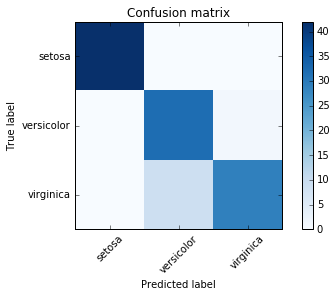

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [30]:
# 75-25 seems to be better at predicting with precision

### 3. Load the breast cancer dataset (`datasets.load_breast_cancer()`) and perform basic exploratory analysis. What attributes to we have? What are we trying to predict?
For context of the data, see the documentation here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [31]:
cancer = datasets.load_breast_cancer()

In [32]:
print(cancer)

{'target_names': array(['malignant', 'benign'], 
      dtype='<U9'), 'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n        \n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 featu

In [33]:
cancer.keys()

dict_keys(['target_names', 'DESCR', 'data', 'feature_names', 'target'])

In [34]:
#cancer['DESCR']

In [35]:
# we are trying to predict how malignant / benign a specific cancer 'feature' is
cancer['target_names']

array(['malignant', 'benign'], 
      dtype='<U9')

In [36]:
cancer['data']

array([[  1.80e+01,   1.04e+01,   1.23e+02, ...,   2.65e-01,   4.60e-01,
          1.19e-01],
       [  2.06e+01,   1.78e+01,   1.33e+02, ...,   1.86e-01,   2.75e-01,
          8.90e-02],
       [  1.97e+01,   2.12e+01,   1.30e+02, ...,   2.43e-01,   3.61e-01,
          8.76e-02],
       ..., 
       [  1.66e+01,   2.81e+01,   1.08e+02, ...,   1.42e-01,   2.22e-01,
          7.82e-02],
       [  2.06e+01,   2.93e+01,   1.40e+02, ...,   2.65e-01,   4.09e-01,
          1.24e-01],
       [  7.76e+00,   2.45e+01,   4.79e+01, ...,   0.00e+00,   2.87e-01,
          7.04e-02]])

In [37]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [38]:
cancer['feature_names'][11]

'texture error'

In [39]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [40]:
x = cancer.data[:,10:11]
print(x)

[[ 1.09]
 [ 0.54]
 [ 0.75]
 [ 0.5 ]
 [ 0.76]
 [ 0.33]
 [ 0.45]
 [ 0.58]
 [ 0.31]
 [ 0.3 ]
 [ 0.38]
 [ 0.51]
 [ 0.96]
 [ 0.4 ]
 [ 0.21]
 [ 0.37]
 [ 0.47]
 [ 0.57]
 [ 0.76]
 [ 0.27]
 [ 0.19]
 [ 0.28]
 [ 0.44]
 [ 0.69]
 [ 0.81]
 [ 1.05]
 [ 0.25]
 [ 0.85]
 [ 0.44]
 [ 0.6 ]
 [ 0.83]
 [ 0.48]
 [ 0.6 ]
 [ 0.56]
 [ 0.33]
 [ 0.46]
 [ 0.29]
 [ 0.18]
 [ 1.21]
 [ 0.21]
 [ 0.24]
 [ 0.24]
 [ 0.98]
 [ 0.37]
 [ 0.19]
 [ 0.63]
 [ 0.16]
 [ 0.29]
 [ 0.26]
 [ 0.23]
 [ 0.41]
 [ 0.19]
 [ 0.23]
 [ 0.83]
 [ 0.31]
 [ 0.32]
 [ 0.73]
 [ 0.42]
 [ 0.4 ]
 [ 0.16]
 [ 0.52]
 [ 0.36]
 [ 0.7 ]
 [ 0.41]
 [ 0.43]
 [ 0.36]
 [ 0.24]
 [ 0.27]
 [ 0.33]
 [ 0.24]
 [ 0.79]
 [ 0.53]
 [ 0.59]
 [ 0.28]
 [ 0.25]
 [ 0.75]
 [ 0.41]
 [ 0.98]
 [ 0.93]
 [ 0.27]
 [ 0.33]
 [ 0.29]
 [ 0.9 ]
 [ 0.52]
 [ 0.23]
 [ 0.7 ]
 [ 0.42]
 [ 0.55]
 [ 0.3 ]
 [ 0.51]
 [ 0.37]
 [ 0.31]
 [ 0.41]
 [ 0.29]
 [ 0.48]
 [ 0.76]
 [ 0.37]
 [ 0.34]
 [ 0.23]
 [ 0.29]
 [ 0.46]
 [ 0.22]
 [ 0.19]
 [ 0.18]
 [ 0.35]
 [ 0.39]
 [ 0.31]
 [ 0.12]
 [ 1.22]
 [ 0.23]
 [ 0.4 ]
 

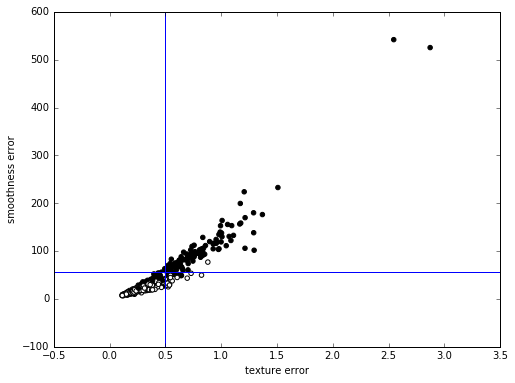

In [87]:
plt.figure(2, figsize=(8, 6))
plt.scatter(x[:,10:11], x[:,13:14], c=y, cmap=plt.cm.CMRmap)
plt.xlabel('texture error')
plt.ylabel('smoothness error')
plt.axhline(y=56)
plt.axvline(x=0.5)

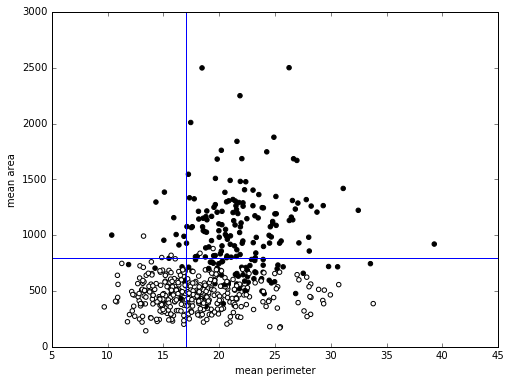

In [77]:
plt.figure(2, figsize=(8, 6))
plt.scatter(x[:,1:2], x[:,3:4], c=y, cmap=plt.cm.CMRmap)
plt.xlabel('mean perimeter')
plt.ylabel('mean area')
plt.axhline(y=800)
plt.axvline(x=17)

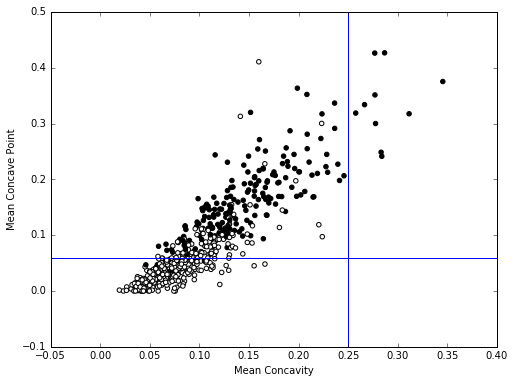

In [85]:
plt.figure(2, figsize=(8, 6))
plt.scatter(x[:,5:6], x[:,6:7], c=y, cmap=plt.cm.CMRmap)
plt.xlabel('Mean Concavity')
plt.ylabel('Mean Concave Point')
plt.axhline(y=0.06)
plt.axvline(x=0.25)

### 4. Using the breast cancer data, create a classifier to predict the type of seed. Perform the above hold out evaluation (50-50 and 75-25) and discuss the results.

## Picking only one attribute : Skin Color

In [46]:
x = cancer.data[:,10:11] # the attributes of skin color
y = cancer.target

In [47]:
dt = tree.DecisionTreeClassifier()


In [48]:
dt = dt.fit(x,y)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.75,train_size=0.25)

In [50]:
dt = dt.fit(x_train,y_train)

In [51]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [52]:
measure_performance(x_test,y_test,dt) #measure on the test data (rather than train)

Accuracy:0.756 

Classification report
             precision    recall  f1-score   support

          0       0.66      0.68      0.67       157
          1       0.81      0.80      0.81       270

avg / total       0.76      0.76      0.76       427
 

Confusion matrix
[[107  50]
 [ 54 216]] 



In [53]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, cancer.target_names, rotation=45)
    plt.yticks(tick_marks, cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
y_pred = dt.fit(x_train, y_train).predict(x_test)

Confusion matrix, without normalization
[[107  50]
 [ 54 216]]


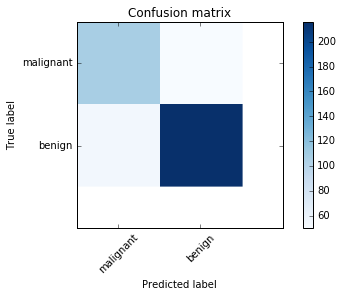

In [55]:
cm = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Predicted 216 for benign but only 54 is true,predicted 50 but there are 107 cases, so this model doesnt work.

## Picking all the attributes and testing the accuracy

In [56]:
x = cancer.data[:,:] # the attributes of skin color
y = cancer.target

In [57]:
dt = tree.DecisionTreeClassifier()


In [58]:
dt = dt.fit(x,y)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.75,train_size=0.25)

In [60]:
dt = dt.fit(x_train,y_train)

In [61]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [62]:
measure_performance(x_test,y_test,dt) #measure on the test data (rather than train)

Accuracy:0.918 

Classification report
             precision    recall  f1-score   support

          0       0.86      0.93      0.89       158
          1       0.96      0.91      0.93       269

avg / total       0.92      0.92      0.92       427
 

Confusion matrix
[[147  11]
 [ 24 245]] 



In [63]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, cancer.target_names, rotation=45)
    plt.yticks(tick_marks, cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
y_pred = dt.fit(x_train, y_train).predict(x_test)

Confusion matrix, without normalization
[[147  11]
 [ 19 250]]


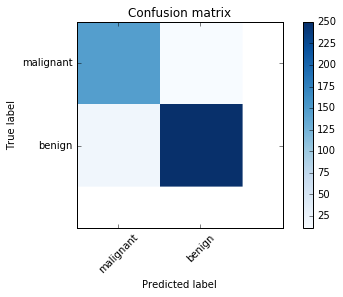

In [65]:

cm = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

predicted 250 for benign but only 19 were true. predicted 11 but there are 147 cases, so this model doesnt work.